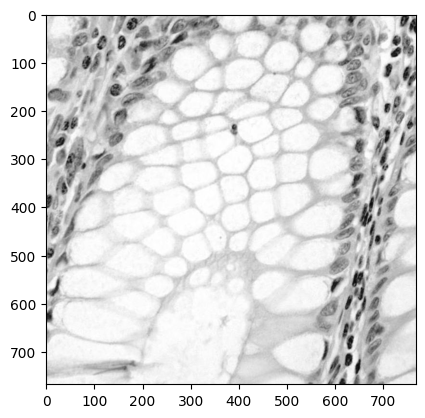

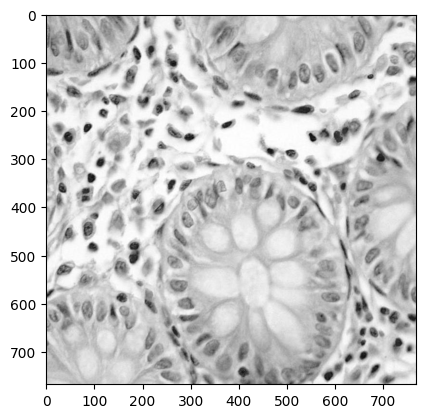

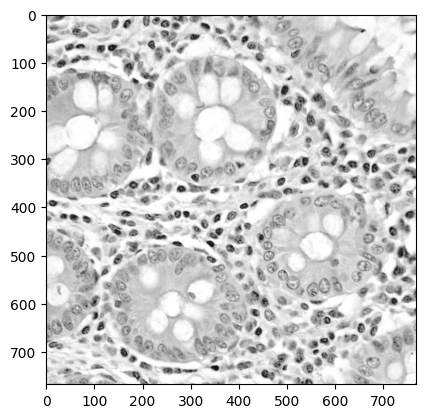

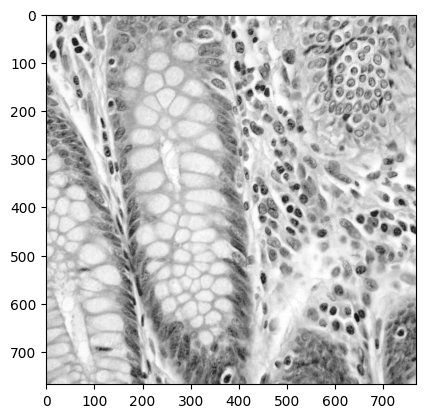

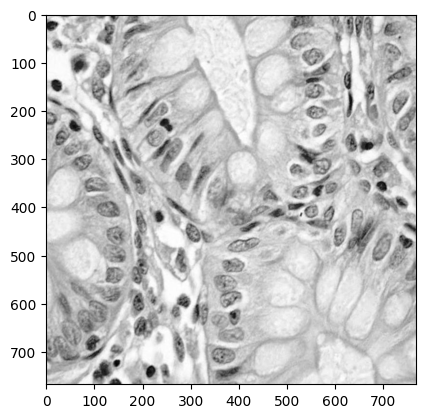

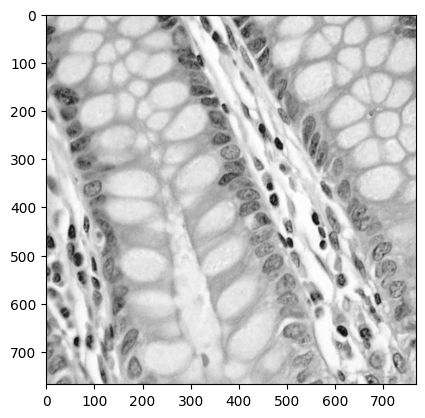

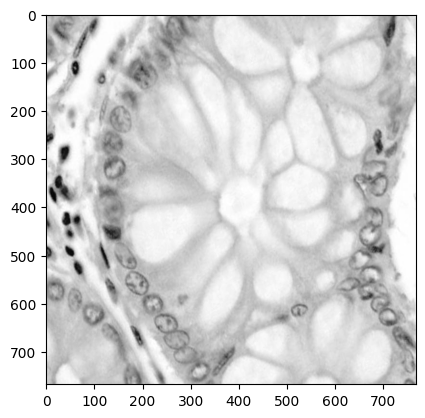

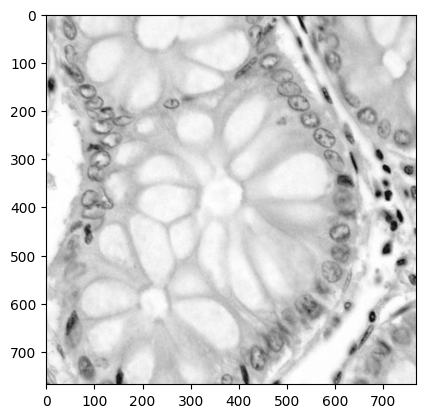

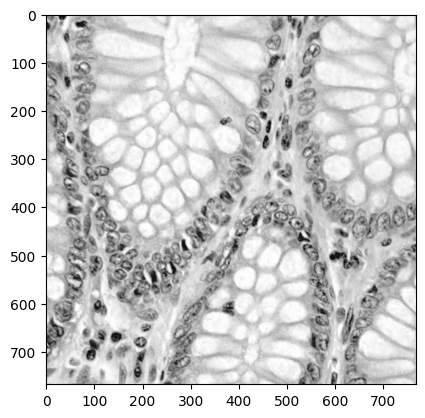

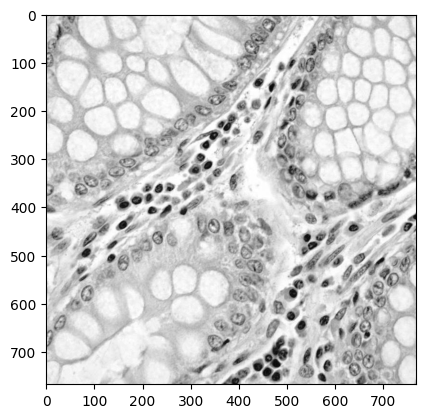

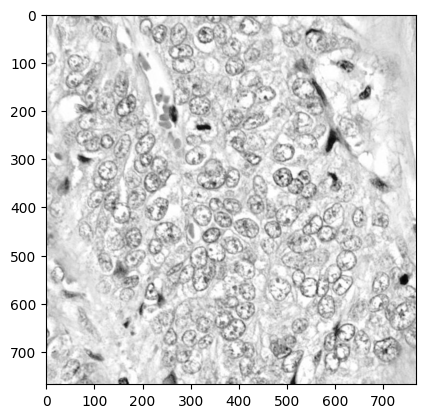

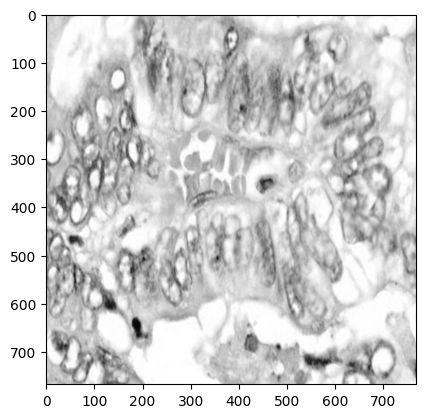

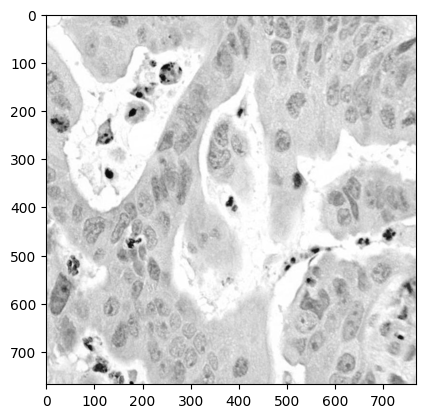

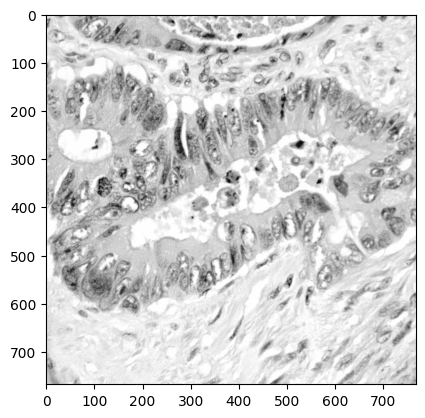

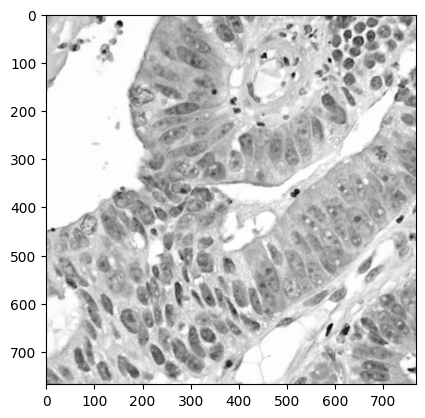

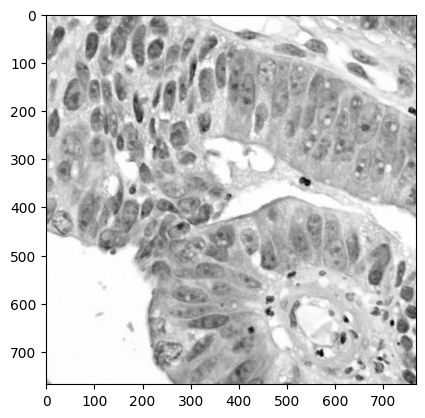

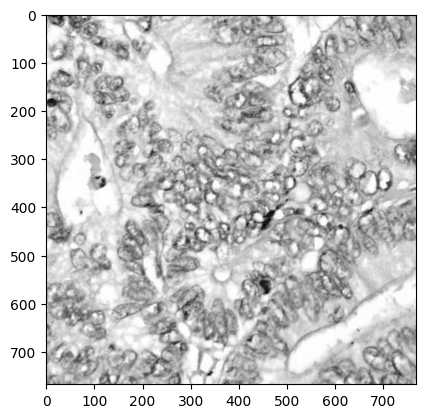

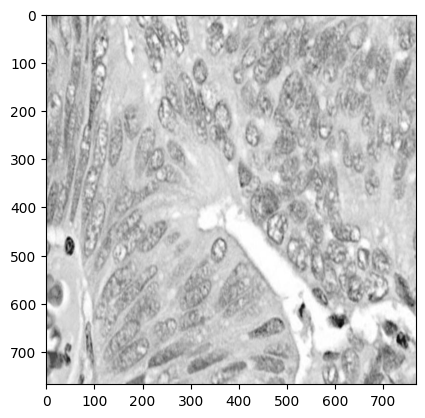

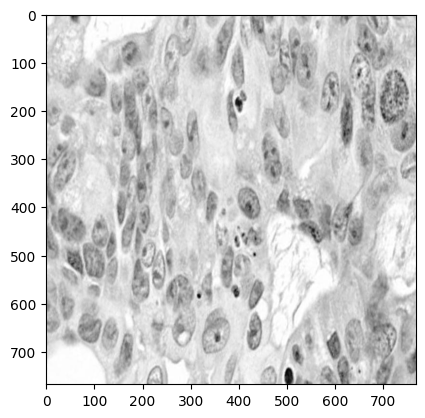

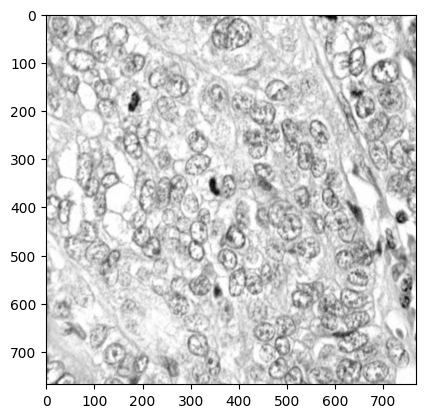

[[176 183 186 ... 236 237 238]
 [180 186 190 ... 239 238 238]
 [186 192 196 ... 240 237 236]
 ...
 [237 237 236 ... 251 251 250]
 [223 225 227 ... 253 253 253]
 [218 221 225 ... 254 255 255]]
(768, 768)


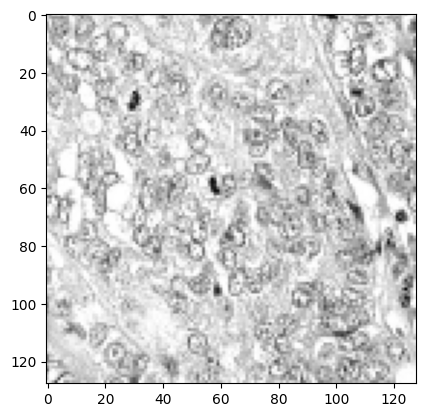

In [1]:
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
DATADIR = 'E:/project pattern/dataset'
CATEGORIES = ["colon_n", "colon_aca"]
for category in CATEGORIES:  
    path = os.path.join(DATADIR, category)  
    x = 0
    for img in os.listdir(path):  
        x += 1
        img_array = cv2.imread(os.path.join(path, img),
                               cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show()  
        if x == 10:
            break

print(img_array)
print(img_array.shape)


IMG_SIZE = 128

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [2]:
training_data = []


def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR, category)  
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(
                    path, img), cv2.IMREAD_GRAYSCALE)  
               
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                
                training_data.append([new_array, class_num])
            except Exception as e:  
                pass


create_training_data()

print(len(training_data))

random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)


100%|██████████| 5000/5000 [02:17<00:00, 36.36it/s]


10000
0
0
1
0
0
0
0
0
1
1
[[[[201]
   [203]
   [211]
   ...
   [228]
   [229]
   [234]]

  [[232]
   [211]
   [216]
   ...
   [233]
   [233]
   [237]]

  [[228]
   [244]
   [228]
   ...
   [239]
   [239]
   [239]]

  ...

  [[247]
   [235]
   [199]
   ...
   [215]
   [214]
   [203]]

  [[246]
   [235]
   [194]
   ...
   [219]
   [223]
   [222]]

  [[248]
   [237]
   [204]
   ...
   [222]
   [224]
   [235]]]]


In [3]:
import pickle


pickle_out = open("E:/project pattern/colon_image_sets/X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("E:/project pattern/colon_image_sets/y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("E:/project pattern/colon_image_sets//X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("E:/project pattern/colon_image_sets//y.pickle", "rb")
y = pickle.load(pickle_in)

In [7]:
from sklearn.model_selection import train_test_split

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

y = np.array(y)  

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [9]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
250/250 [==============================] - 15s 50ms/step - loss: 0.7019 - accuracy: 0.5039 - val_loss: 0.6935 - val_accuracy: 0.4995
Epoch 2/10
250/250 [==============================] - 12s 47ms/step - loss: 0.7022 - accuracy: 0.4976 - val_loss: 0.6933 - val_accuracy: 0.5005
Epoch 3/10
250/250 [==============================] - 12s 48ms/step - loss: 0.7002 - accuracy: 0.4896 - val_loss: 0.6935 - val_accuracy: 0.4995
Epoch 4/10
250/250 [==============================] - 12s 47ms/step - loss: 0.6998 - accuracy: 0.5056 - val_loss: 0.7154 - val_accuracy: 0.4995
Epoch 5/10
250/250 [==============================] - 12s 48ms/step - loss: 0.7008 - accuracy: 0.5046 - val_loss: 0.6933 - val_accuracy: 0.5005
Epoch 6/10
250/250 [==============================] - 12s 47ms/step - loss: 0.6968 - accuracy: 0.4961 - val_loss: 0.6986 - val_accuracy: 0.4995
Epoch 7/10
250/250 [==============================] - 12s 47ms/step - loss: 0.6950 - accuracy: 0.5034 - val_loss: 0.6933 - val_accuracy:

<Axes: xlabel='category'>

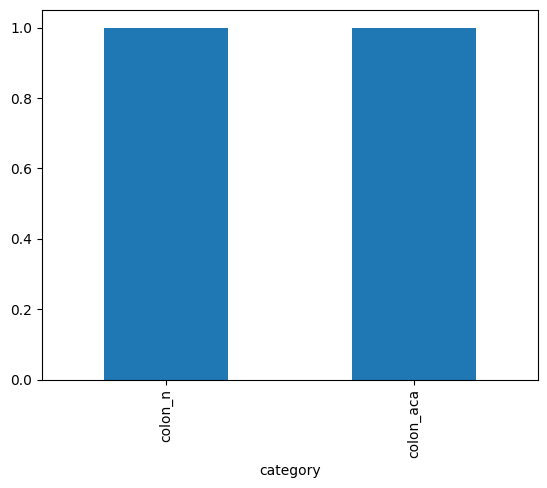

In [10]:
import pandas as pd 
df = pd.DataFrame({
    'filename': DATADIR,
    'category': CATEGORIES
})
df['category'].value_counts().plot.bar()

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=1
model = Sequential()

model.add(Conv2D(1, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 1)       10        
                                                                 
 batch_normalization_4 (Batc  (None, 126, 126, 1)      4         
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 1)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        640       
                                                                 
 batch_normalization_5 (Batc  (None, 61, 61, 64)      

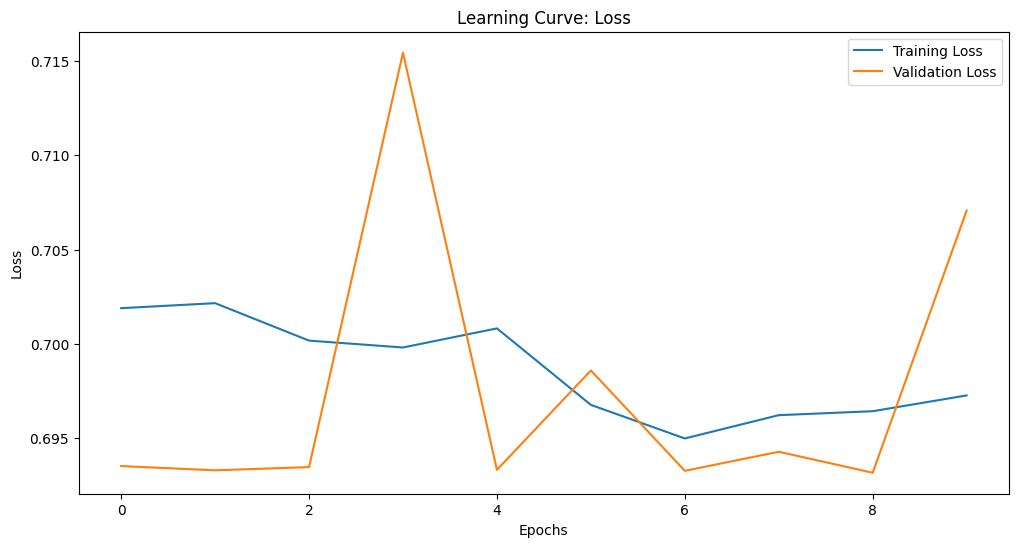

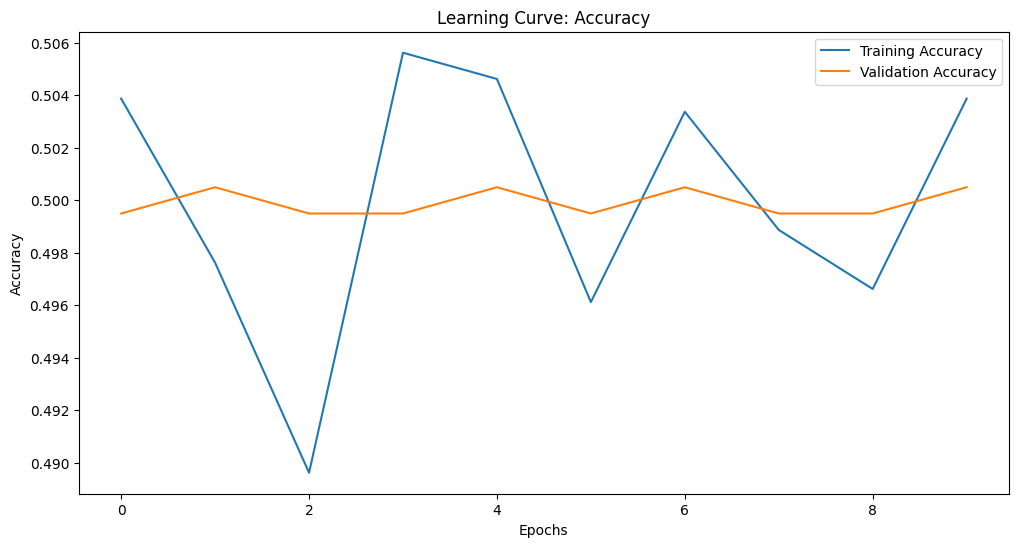

In [12]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot learning curve for loss
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve: Loss')
plt.legend()
plt.show()

# Plot learning curve for accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Accuracy')
plt.legend()
plt.show()


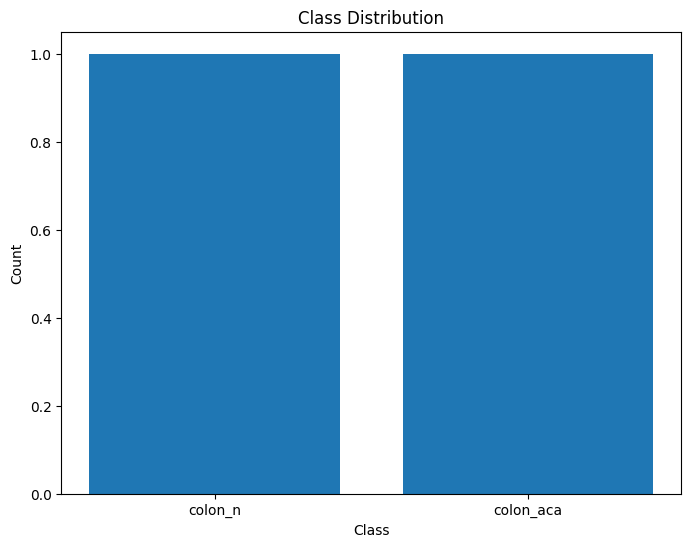

In [13]:
# Count the number of samples in each class
class_counts = df['category'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


63/63 [==============================] - 15s 231ms/step


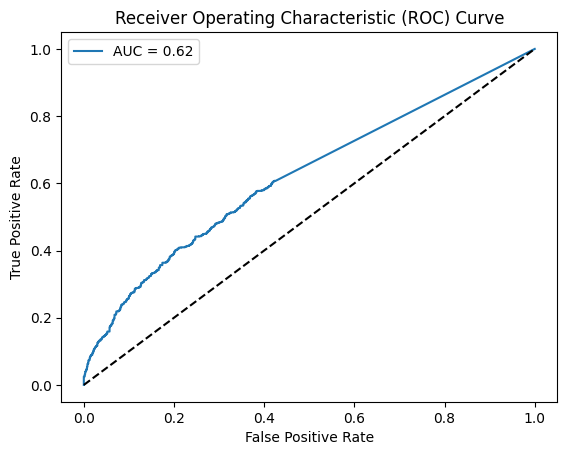

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import cv2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert grayscale images in X_test to RGB
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Get predicted probabilities for positive class
y_pred_probs = model.predict(X_test_rgb)[:, 1]

# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


63/63 [==============================] - 10s 149ms/step


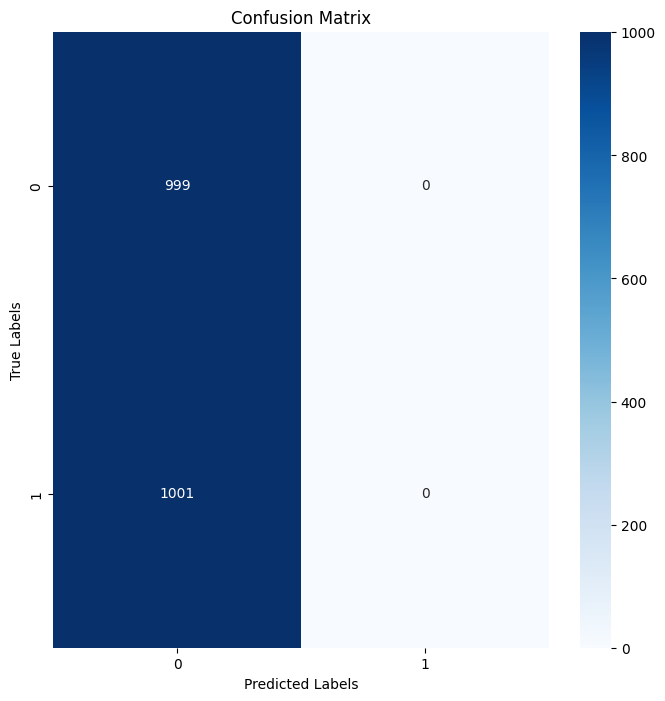

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
